In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('peptides.csv')
df1 = pd.read_csv('proteins.csv')

In [70]:
df.head()

visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance  
0                           NEQEQPLGQWHLS           11254.3  
1                             GNPEPTFSWTK          102060.0  
2                         IEIPSSVQQVPTIIK          174185.0  
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  
4                            SMEQNGPGLEYR           30838.7

In [4]:
df.tail()

visit_id  visit_month  patient_id UniProt  \
981829  58648_108          108       58648  Q9UHG2   
981830  58648_108          108       58648  Q9UKV8   
981831  58648_108          108       58648  Q9Y646   
981832  58648_108          108       58648  Q9Y6R7   
981833  58648_108          108       58648  Q9Y6R7   

                                 Peptide  PeptideAbundance  
981829                   ILAGSADSEGVAAPR         202820.00  
981830                     SGNIPAGTTVDTK         105830.00  
981831                       LALLVDTVGPR          21257.60  
981832  AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26  
981833                    GATTSPGVYELSSR          12825.90

In [5]:
df.shape

(981834, 6)

In [6]:
df.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [10]:
df.describe()

visit_month     patient_id  PeptideAbundance
count  981834.000000  981834.000000      9.818340e+05
mean       26.105061   32603.465361      6.428902e+05
std        22.913897   18605.934422      3.377989e+06
min         0.000000      55.000000      1.099850e+01
25%         6.000000   16566.000000      2.817425e+04
50%        24.000000   29313.000000      7.430830e+04
75%        48.000000   49995.000000      2.213388e+05
max       108.000000   65043.000000      1.787520e+08

In [11]:
df.nunique()

visit_id              1113
visit_month             15
patient_id             248
UniProt                227
Peptide                968
PeptideAbundance    738931
dtype: int64

In [14]:
df['visit_month'].unique()

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108], dtype=int64)

In [15]:
df['visit_month'].value_counts()

0      171048
12     158114
24     152036
36     130903
48     121343
6      110733
60      74562
84      26729
72      18642
18       6822
108      3631
3        2742
96       1815
54       1801
30        913
Name: visit_month, dtype: int64

# Exploratory Data Analysis

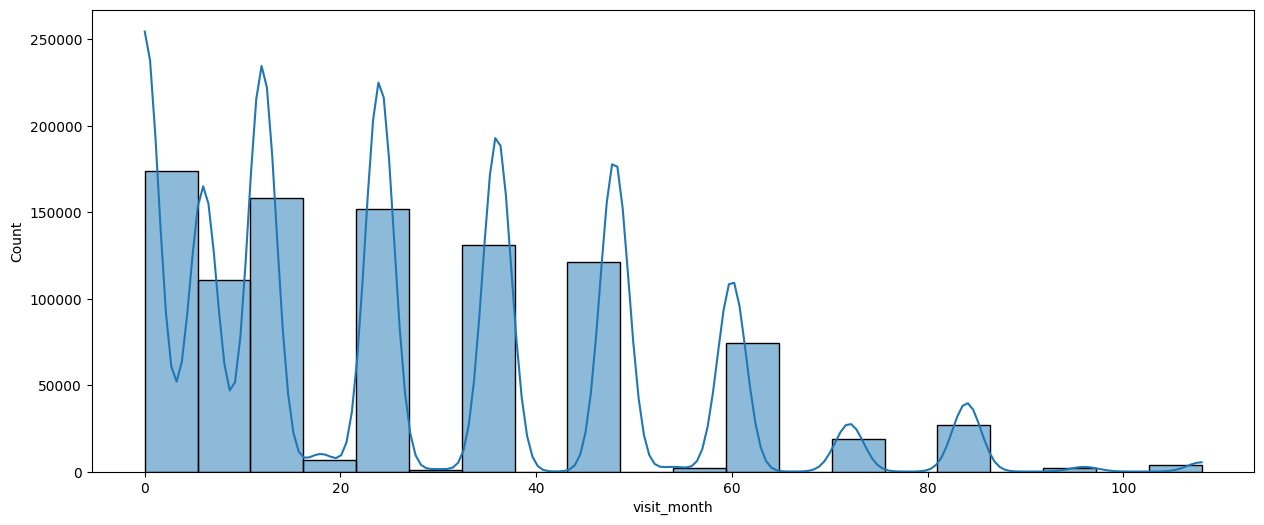

In [16]:
plt.figure(figsize=(15,6))
sns.histplot(df['visit_month'], kde = True, bins = 20, palette = 'hls')
plt.show()

In [18]:
df['patient_id'].unique()

array([   55,  1517,  1923,  2660,  3636,  3863,  4161,  4172,  5027,
        5178,  5645,  5742,  6054,  6211,  7051,  7117,  7568,  7832,
        8699, 10053, 10174, 10541, 10715, 10718, 11459, 11686, 11928,
       12516, 12636, 12703, 12755, 13368, 13618, 13968, 14035, 14124,
       14242, 14450, 14811, 15009, 15504, 15590, 16238, 16347, 16566,
       16574, 17154, 17414, 17727, 18183, 18204, 18553, 18560, 19088,
       20212, 20216, 20352, 20404, 20664, 20791, 21126, 21537, 21729,
       22126, 22623, 23192, 23244, 23391, 23636, 24278, 24690, 24820,
       24911, 25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210,
       26809, 27079, 27300, 27464, 27468, 27715, 27971, 28327, 28342,
       28818, 29313, 29417, 30119, 30155, 30416, 30894, 30951, 31121,
       31154, 31693, 33548, 33558, 34182, 35231, 35465, 35477, 35675,
       35696, 36797, 37312, 37566, 38419, 39144, 40022, 40200, 40340,
       40751, 40874, 40967, 41444, 41617, 41628, 41871, 41883, 41930,
       42003, 42385,

In [19]:
df['patient_id'].value_counts()

20404    8272
23391    8147
62723    8111
26210    8076
18183    7965
         ... 
55240    1810
52119    1804
25911    1782
42086    1781
41930     876
Name: patient_id, Length: 248, dtype: int64

In [20]:
df['UniProt'].unique()

array(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791',
       'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326',
       'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738',
       'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009',
       'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033',
       'P01034', 'P01042', 'P01344', 'P01591', 'P01608', 'P01621',
       'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859',
       'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647',
       'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675',
       'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751',
       'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
       'P02774', 'P02787', 'P02790', 'P04004', 'P04075', 'P04156',
       'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217',
       'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090',
       'P05155', 'P05156', 'P05408', 'P05452', 'P05546', 'P063

In [21]:
df['UniProt'].value_counts()

P02787    51916
P02768    40900
P01024    35253
P02751    27370
P02649    23082
          ...  
Q6UX71      661
P01780      654
Q562R1      616
Q99832      606
Q99829      489
Name: UniProt, Length: 227, dtype: int64

In [22]:
df['Peptide'].unique()

array(['NEQEQPLGQWHLS', 'GNPEPTFSWTK', 'IEIPSSVQQVPTIIK',
       'KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK', 'SMEQNGPGLEYR',
       'TLKIENVSYQDKGNYR', 'VIAVNEVGR', 'VMTPAVYAPYDVK',
       'VNGSPVDNHPFAGDVVFPR', 'ELDLNSVLLK', 'HGTC(UniMod_4)AAQVDALNSQKK',
       'ALPGTPVASSQPR', 'LFGGNFAHQASVAR', 'LYQQHGAGLFDVTR',
       'VTEPISAESGEQVER', 'AYQGVAAPFPK', 'QQETAAAETETR', 'THLGEALAPLSK',
       'ASGSPEPAISWFR', 'NIINSDGGPYVC(UniMod_4)R', 'TALASGGVLDASGDYR',
       'TQSSLVPALTDFVR', 'ALMSPAGMLR', 'GLYDVVSVLR',
       'SEGLLAC(UniMod_4)GTNAR', 'ILEVVNQIQDEER', 'QALNTDYLDSDYQR',
       'ADDLGKGGNEESTKTGNAGSR', 'TLVVHEKADDLGKGGNEESTK', 'ALYLQYTDETFR',
       'EVGPTNADPVC(UniMod_4)LAK', 'FNKNNEGTYYSPNYNPQSR', 'GAYPLSIEPIGVR',
       'KAEEEHLGILGPQLHADVGDKVK', 'MFTTAPDQVDKEDEDFQESNK',
       'MYYSAVDPTKDIFTGLIGPM(UniMod_35)K', 'NNEGTYYSPNYNPQSR',
       'QYTDSTFRVPVER', 'SVPPSASHVAPTETFTYEWTVPK',
       'DKLAAC(UniMod_4)LEGNC(UniMod_4)AEGLGTNYR', 'ELLESYIDGR',
       'LAVTTHGLPC(UniMod_4)LAWASAQ

In [23]:
df['Peptide'].value_counts()

TLLSNLEEAK                1113
IPTTFENGR                 1113
NILTSNNIDVK               1113
KYLYEIAR                  1113
AIGYLNTGYQR               1113
                          ... 
HYEGSTVPEK                 605
SLEDQVEMLR                 599
TPSGLYLGTC(UniMod_4)ER     590
EPQVYTLPPSRDELTK           563
QALPQVR                    489
Name: Peptide, Length: 968, dtype: int64

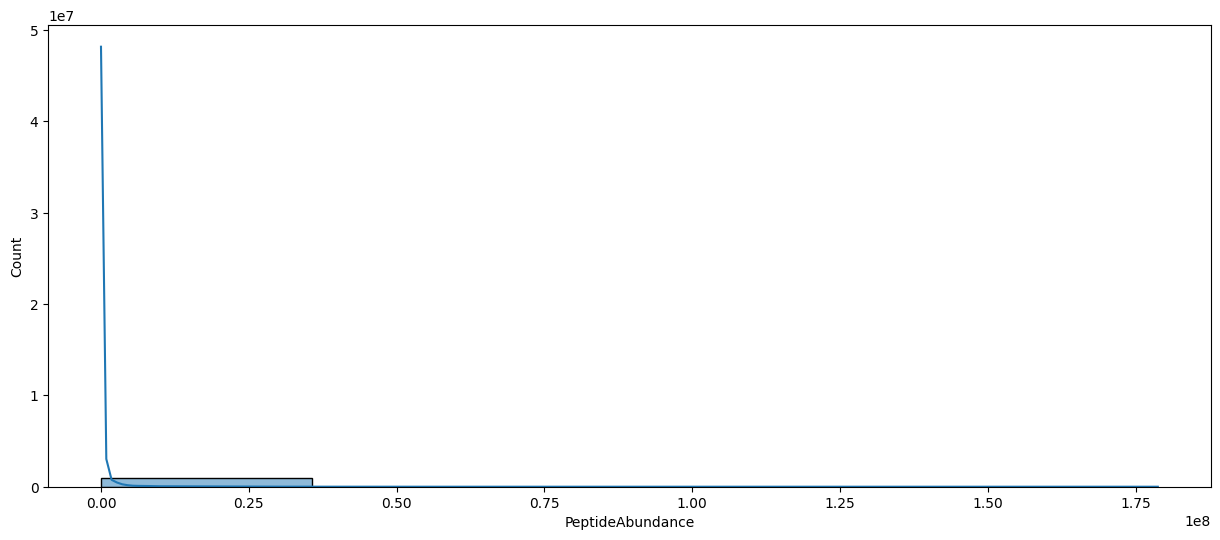

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(df['PeptideAbundance'], bins = 5, kde = True, palette = 'hls')
plt.show()

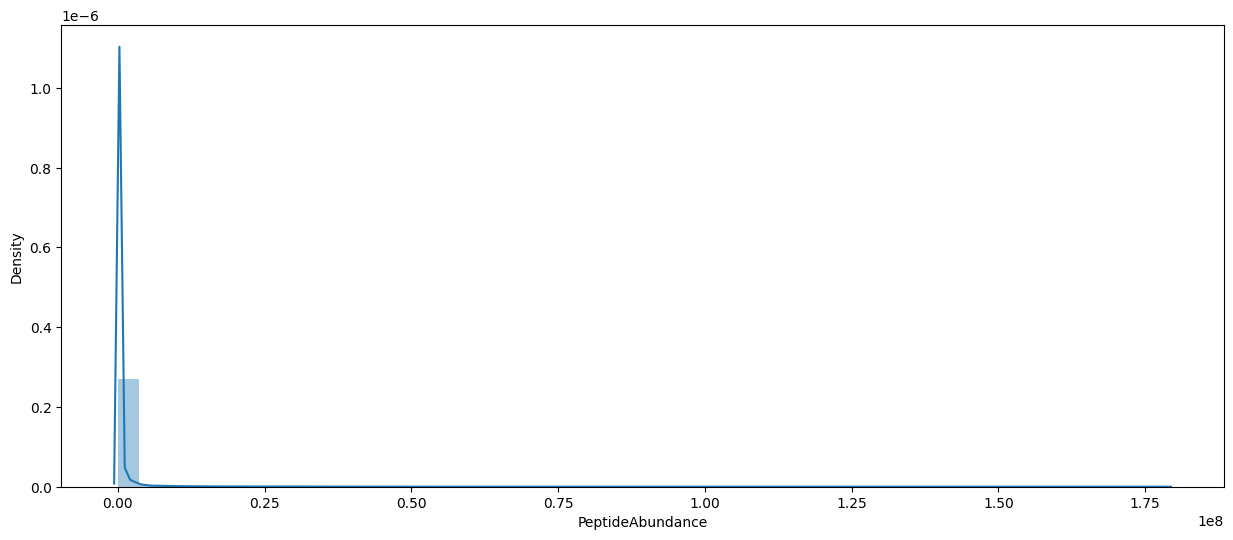

In [26]:
plt.figure(figsize=(15,6))
sns.distplot(df['PeptideAbundance'], kde = True)
plt.show()

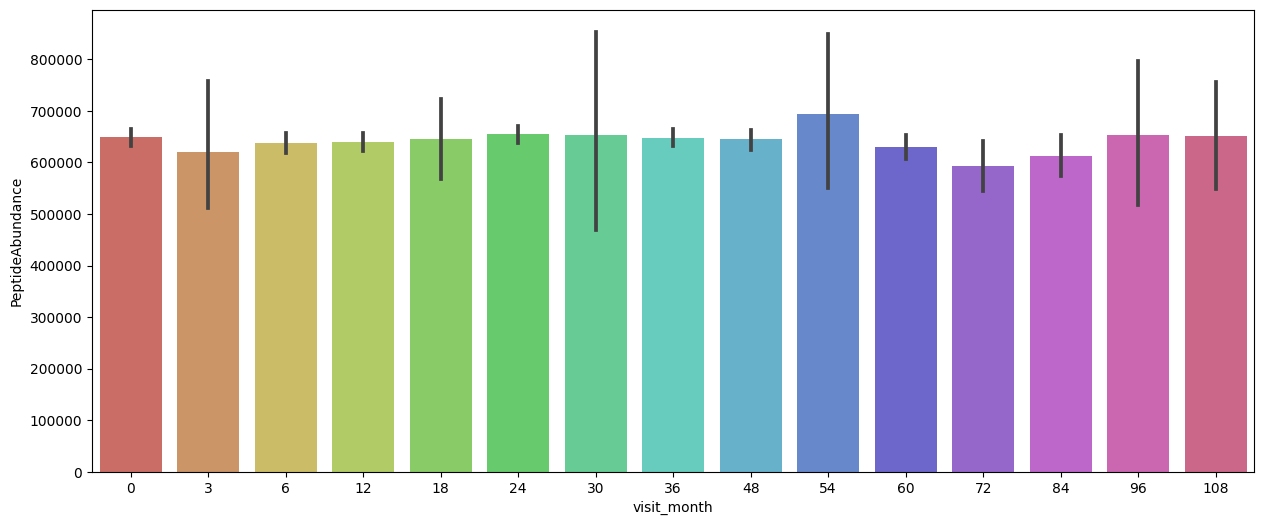

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['visit_month'], y = df['PeptideAbundance'], palette = 'hls')
plt.show()

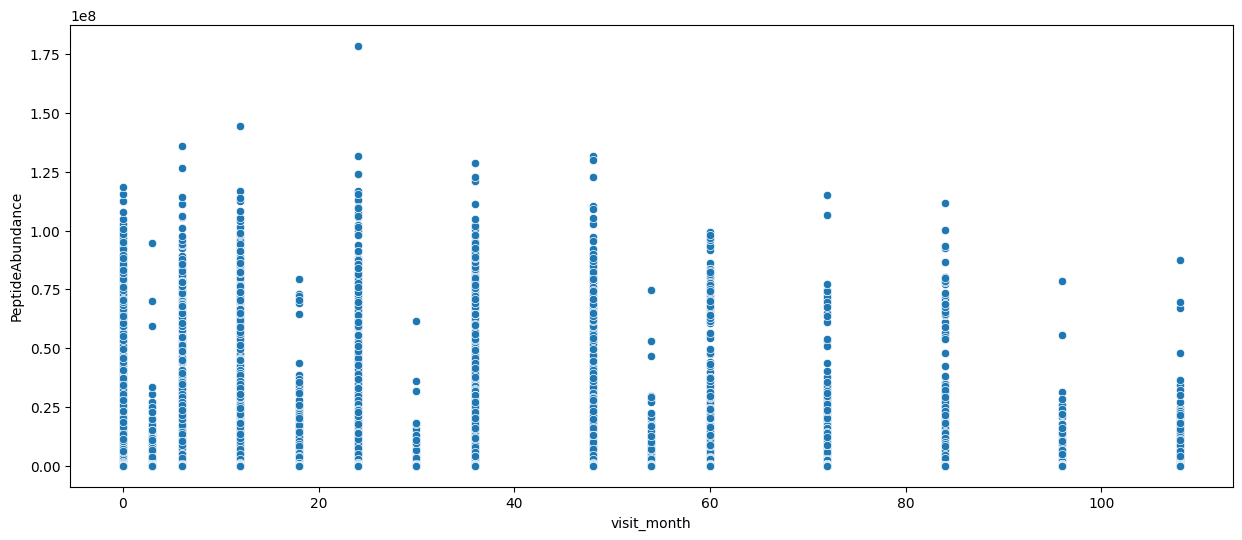

In [30]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['visit_month'], y = df['PeptideAbundance'], palette = 'hls')
plt.show()

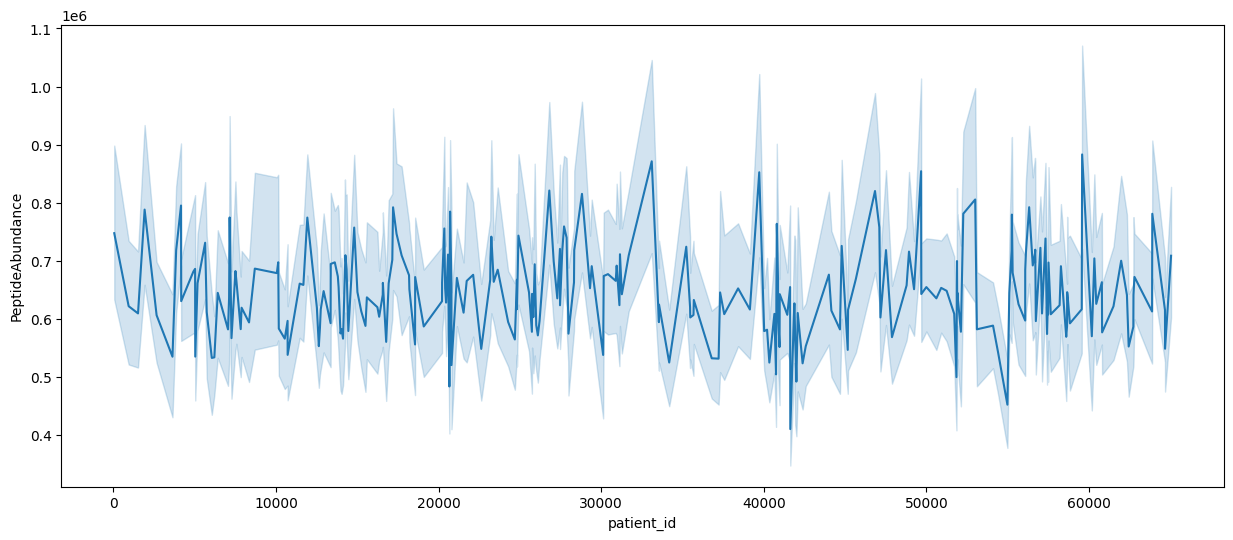

In [31]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['patient_id'], y = df['PeptideAbundance'], palette = 'hls')
plt.show()

# Outliers Removal

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

C:\Users\tomar\AppData\Local\Temp\ipykernel_25508\2124870280.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\tomar\AppData\Local\Temp\ipykernel_25508\2124870280.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [38]:
print(IQR)

visit_month             42.0
patient_id           33429.0
PeptideAbundance    193164.5
dtype: float64


In [5]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\tomar\AppData\Local\Temp\ipykernel_25508\2227700030.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [40]:
df.shape

(847363, 6)

In [41]:
df_corr = df.corr()

In [42]:
df_corr

visit_month  patient_id  PeptideAbundance
visit_month          1.000000   -0.018923          0.001200
patient_id          -0.018923    1.000000         -0.000602
PeptideAbundance     0.001200   -0.000602          1.000000

In [44]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [46]:
df1.head()

visit_id  visit_month  patient_id UniProt       NPX
0     55_0            0          55  O00391   11254.3
1     55_0            0          55  O00533  732430.0
2     55_0            0          55  O00584   39585.8
3     55_0            0          55  O14498   41526.9
4     55_0            0          55  O14773   31238.0

In [47]:
df1.tail()

visit_id  visit_month  patient_id UniProt       NPX
232736  58648_108          108       58648  Q9UBX5   27387.8
232737  58648_108          108       58648  Q9UHG2  369437.0
232738  58648_108          108       58648  Q9UKV8  105830.0
232739  58648_108          108       58648  Q9Y646   21257.6
232740  58648_108          108       58648  Q9Y6R7   17953.1

In [48]:
df1.shape

(232741, 5)

In [49]:
df1.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX'], dtype='object')

In [50]:
df1.duplicated().sum()

0

In [51]:
df1.isnull().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [53]:
df1.describe()

visit_month     patient_id           NPX
count  232741.000000  232741.000000  2.327410e+05
mean       26.099205   32593.881873  2.712077e+06
std        22.874719   18608.479506  2.224155e+07
min         0.000000      55.000000  8.460820e+01
25%         6.000000   16566.000000  2.946440e+04
50%        24.000000   29313.000000  1.135560e+05
75%        48.000000   49995.000000  5.638940e+05
max       108.000000   65043.000000  6.138510e+08

In [54]:
df1.nunique()

visit_id         1113
visit_month        15
patient_id        248
UniProt           227
NPX            218795
dtype: int64

In [55]:
df1['visit_month'].unique()

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108], dtype=int64)

In [56]:
df1['visit_month'].value_counts()

0      40587
12     37467
24     36225
36     31156
48     28838
6      25991
60     17572
84      6288
72      4407
18      1657
108      855
3        641
96       423
54       418
30       216
Name: visit_month, dtype: int64

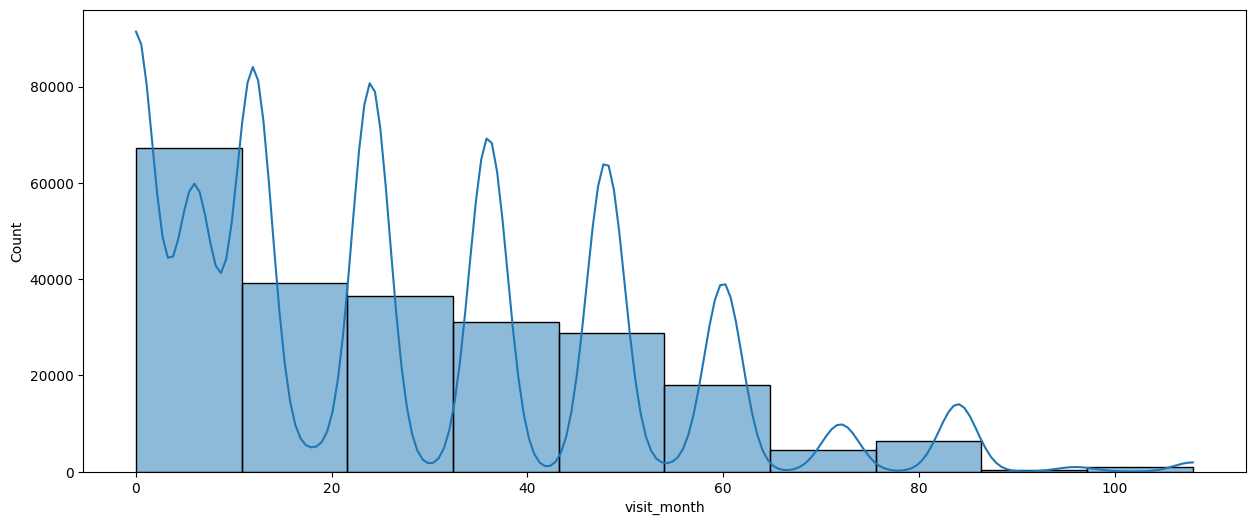

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df1['visit_month'], kde = True, bins = 10, palette = 'hls')
plt.show()

In [ ]:
df1['patient_id'].unique()

array([   55,  1517,  1923,  2660,  3636,  3863,  4161,  4172,  5027,
        5178,  5645,  5742,  6054,  6211,  7051,  7117,  7568,  7832,
        8699, 10053, 10174, 10541, 10715, 10718, 11459, 11686, 11928,
       12516, 12636, 12703, 12755, 13368, 13618, 13968, 14035, 14124,
       14242, 14450, 14811, 15009, 15504, 15590, 16238, 16347, 16566,
       16574, 17154, 17414, 17727, 18183, 18204, 18553, 18560, 19088,
       20212, 20216, 20352, 20404, 20664, 20791, 21126, 21537, 21729,
       22126, 22623, 23192, 23244, 23391, 23636, 24278, 24690, 24820,
       24911, 25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210,
       26809, 27079, 27300, 27464, 27468, 27715, 27971, 28327, 28342,
       28818, 29313, 29417, 30119, 30155, 30416, 30894, 30951, 31121,
       31154, 31693, 33548, 33558, 34182, 35231, 35465, 35477, 35675,
       35696, 36797, 37312, 37566, 38419, 39144, 40022, 40200, 40340,
       40751, 40874, 40967, 41444, 41617, 41628, 41871, 41883, 41930,
       42003, 42385,

In [ ]:
df1['patient_id'].value_counts()

62723    1929
20404    1924
23391    1919
26210    1912
18183    1899
         ... 
55240     429
42086     427
25911     419
52119     417
41930     199
Name: patient_id, Length: 248, dtype: int64

In [ ]:
df1['UniProt'].unique()

array(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791',
       'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326',
       'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738',
       'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009',
       'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033',
       'P01034', 'P01042', 'P01344', 'P01591', 'P01608', 'P01621',
       'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859',
       'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647',
       'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675',
       'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751',
       'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
       'P02774', 'P02787', 'P02790', 'P04004', 'P04075', 'P04156',
       'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217',
       'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090',
       'P05155', 'P05156', 'P05408', 'P05452', 'P05546', 'P063

In [ ]:
df1['UniProt'].value_counts()

P01024    1113
P05090    1113
P01011    1113
P01023    1113
Q92520    1113
          ... 
Q6UX71     661
P01780     654
Q562R1     616
Q99832     606
Q99829     489
Name: UniProt, Length: 227, dtype: int64

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df1['NPX'], kde = True, bins = 2, palette = 'hls')
plt.show()

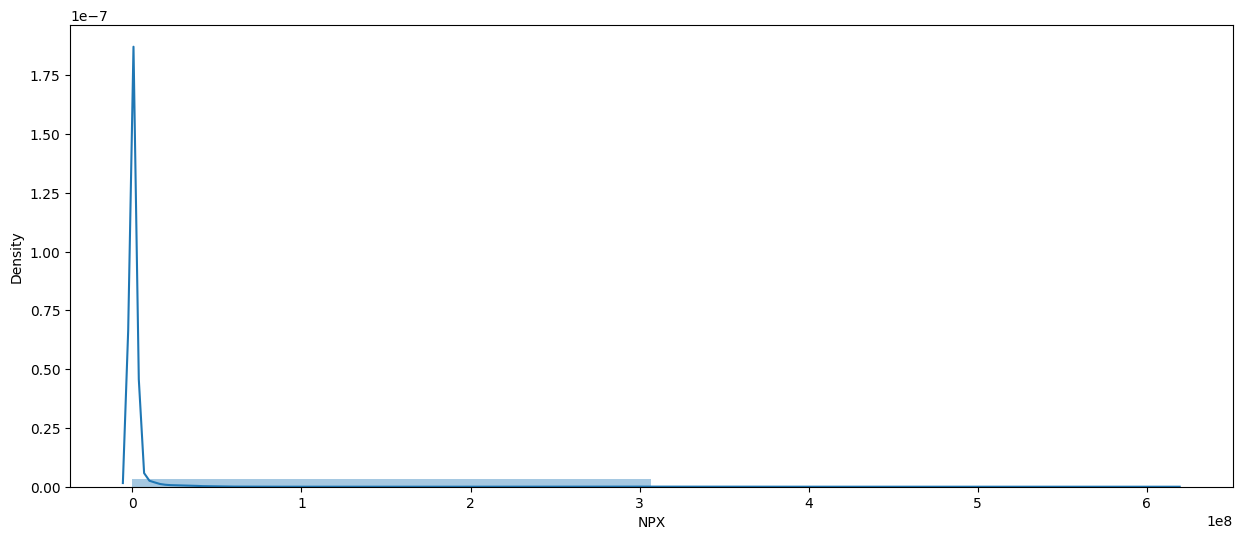

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df1['NPX'], kde = True, bins = 2)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = df1['visit_month'], y = df1['NPX'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [8]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1

C:\Users\tomar\AppData\Local\Temp\ipykernel_25508\1441354529.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
C:\Users\tomar\AppData\Local\Temp\ipykernel_25508\1441354529.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)


In [ ]:
print(IQR)

visit_month        42.0
patient_id      33429.0
NPX            534429.6
dtype: float64


In [9]:
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\tomar\AppData\Local\Temp\ipykernel_25508\1372561784.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df1.shape

(200981, 5)

In [ ]:
df1_corr = df1.corr()

In [ ]:
df1_corr

visit_month  patient_id       NPX
visit_month     1.000000   -0.021061 -0.000708
patient_id     -0.021061    1.000000  0.002519
NPX            -0.000708    0.002519  1.000000

In [ ]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df1_corr)
sns.heatmap(df1_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [4]:
df2 = pd.read_csv('clinical_data.csv')

In [ ]:
df2.head()

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0     55_0          55            0     10.0      6.0     15.0      NaN   
1     55_3          55            3     10.0      7.0     25.0      NaN   
2     55_6          55            6      8.0     10.0     34.0      NaN   
3     55_9          55            9      8.0      9.0     30.0      0.0   
4    55_12          55           12     10.0     10.0     41.0      0.0   

  upd23b_clinical_state_on_medication  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                  On  
4                                  On

In [ ]:
df2.tail()

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
2610  65043_48       65043           48      7.0      6.0     13.0      0.0   
2611  65043_54       65043           54      4.0      8.0     11.0      1.0   
2612  65043_60       65043           60      6.0      6.0     16.0      1.0   
2613  65043_72       65043           72      3.0      9.0     14.0      1.0   
2614  65043_84       65043           84      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  
2610                                 Off  
2611                                 Off  
2612                                 Off  
2613                                 Off  
2614                                 Off

In [ ]:
df2.shape

(2615, 8)

In [ ]:
df2.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [ ]:
df2.describe()

patient_id  visit_month      updrs_1     updrs_2      updrs_3  \
count   2615.000000  2615.000000  2614.000000  2613.00000  2590.000000   
mean   32651.743786    31.190822     7.110559     6.74359    19.421236   
std    18535.758700    25.199053     5.525955     6.32323    15.000289   
min       55.000000     0.000000     0.000000     0.00000     0.000000   
25%    16574.000000    10.500000     3.000000     1.00000     6.000000   
50%    29417.000000    24.000000     6.000000     5.00000    19.000000   
75%    50611.000000    48.000000    10.000000    10.00000    29.000000   
max    65043.000000   108.000000    33.000000    40.00000    86.000000   

           updrs_4  
count  1577.000000  
mean      1.861763  
std       3.022112  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       3.000000  
max      20.000000

In [ ]:
df2.nunique()

visit_id                               2615
patient_id                              248
visit_month                              17
updrs_1                                  32
updrs_2                                  36
updrs_3                                  72
updrs_4                                  19
upd23b_clinical_state_on_medication       2
dtype: int64

# Handling Null values

In [ ]:
mean_value = df2['updrs_1'].mean()

In [ ]:
df2['updrs_1'] = df2['updrs_1'].replace({pd.np.nan: mean_value})

In [ ]:
mean_value = df2['updrs_2'].mean()

In [ ]:
df2['updrs_2'] = df2['updrs_2'].replace({pd.np.nan: mean_value})

In [ ]:
mean_value = df2['updrs_3'].mean()

In [ ]:
df2['updrs_3'] = df2['updrs_3'].replace({pd.np.nan: mean_value})

In [ ]:
mean_value = df2['updrs_4'].mean()

In [ ]:
df2['updrs_4'] = df2['updrs_4'].replace({pd.np.nan: mean_value})

In [11]:
df2['upd23b_clinical_state_on_medication'].fillna('Not Avaliable', inplace=True)

In [ ]:
df2.isnull().sum()

visit_id                               0
patient_id                             0
visit_month                            0
updrs_1                                0
updrs_2                                0
updrs_3                                0
updrs_4                                0
upd23b_clinical_state_on_medication    0
dtype: int64

In [ ]:
df2['visit_id'].unique()

array(['55_0', '55_3', '55_6', ..., '65043_60', '65043_72', '65043_84'],
      dtype=object)

In [ ]:
df2['patient_id'].unique()

array([   55,   942,  1517,  1923,  2660,  3636,  3863,  4161,  4172,
        4923,  5027,  5036,  5178,  5645,  5742,  6054,  6211,  6420,
        7051,  7117,  7151,  7265,  7508,  7568,  7832,  7886,  8344,
        8699, 10053, 10138, 10174, 10541, 10715, 10718, 11459, 11686,
       11928, 12516, 12636, 12703, 12755, 12931, 13360, 13368, 13618,
       13804, 13852, 13968, 14035, 14124, 14242, 14270, 14344, 14450,
       14811, 15009, 15245, 15504, 15590, 16238, 16347, 16566, 16574,
       16778, 16931, 17154, 17201, 17414, 17727, 18183, 18204, 18553,
       18560, 19088, 20212, 20216, 20352, 20404, 20460, 20581, 20664,
       20707, 20791, 20792, 21126, 21537, 21729, 22126, 22623, 23175,
       23192, 23244, 23391, 23636, 24278, 24690, 24818, 24820, 24911,
       25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210, 26809,
       27079, 27300, 27464, 27468, 27607, 27715, 27872, 27893, 27971,
       27987, 28327, 28342, 28818, 29313, 29417, 30119, 30155, 30416,
       30894, 30951,

In [ ]:
df2['patient_id'].value_counts()

55096    17
57108    17
15009    17
16778    16
52266    16
         ..
13968     5
20792     5
62732     4
60443     3
14450     3
Name: patient_id, Length: 248, dtype: int64

In [ ]:
df2['visit_month'].unique()

array([  0,   3,   6,   9,  12,  18,  24,  30,  36,  42,  48,  54,  60,
        72,  84,  96, 108], dtype=int64)

In [ ]:
df2['visit_month'].value_counts()

0      248
12     243
24     243
36     226
48     196
6      192
18     187
30     173
60     166
42     154
3      115
54     110
84     100
9       99
72      93
96      58
108     12
Name: visit_month, dtype: int64

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = df2['visit_month'], data = df2, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x = df2['visit_month'], kde = True, bins = 10, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

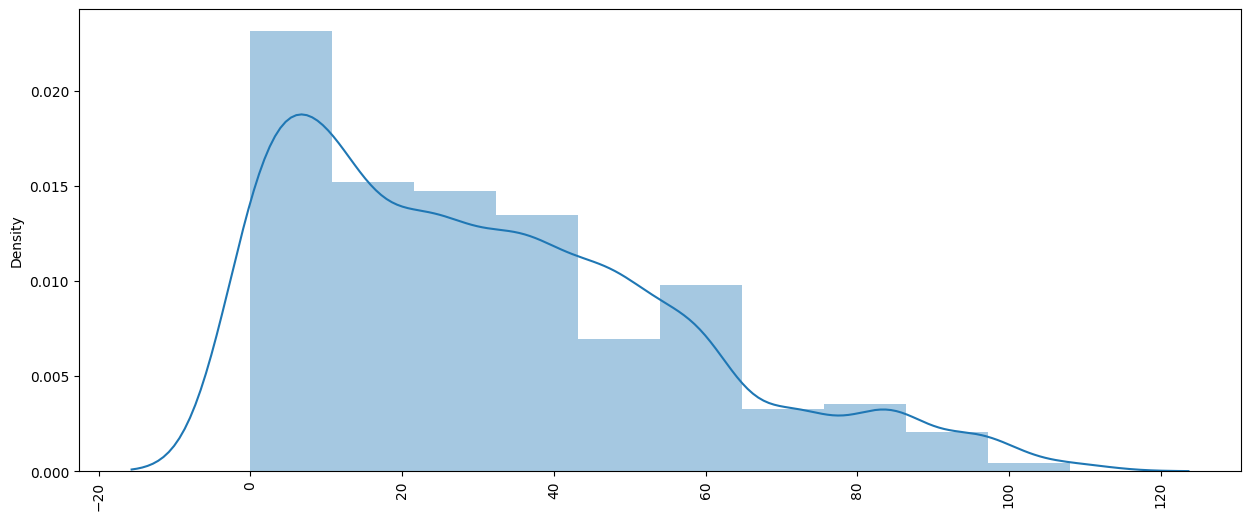

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(x = df2['visit_month'], kde = True, bins = 10)
plt.xticks(rotation = 90)
plt.show()

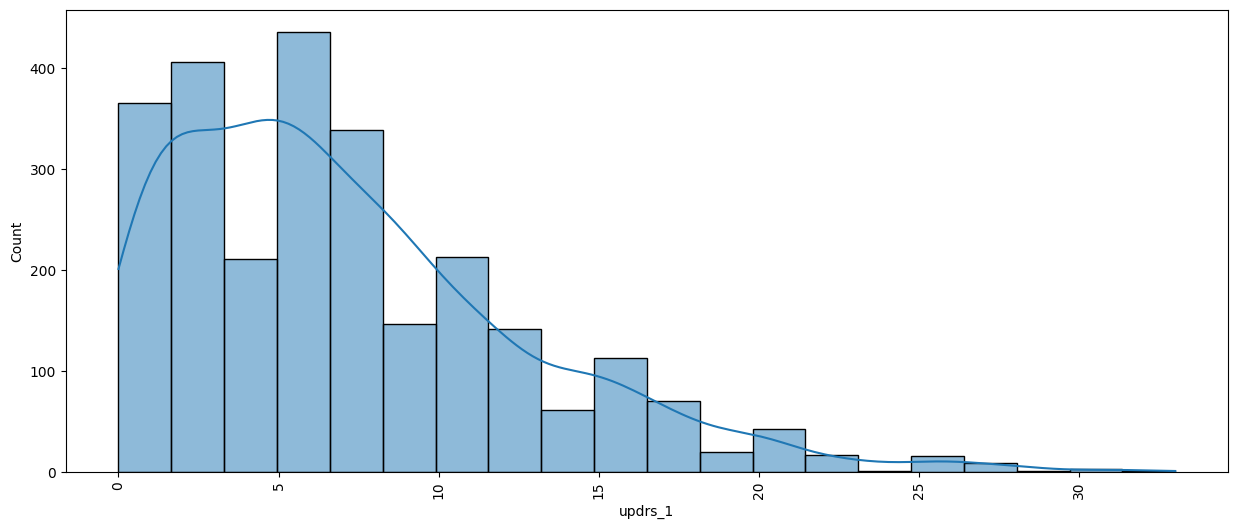

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x = df2['updrs_1'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

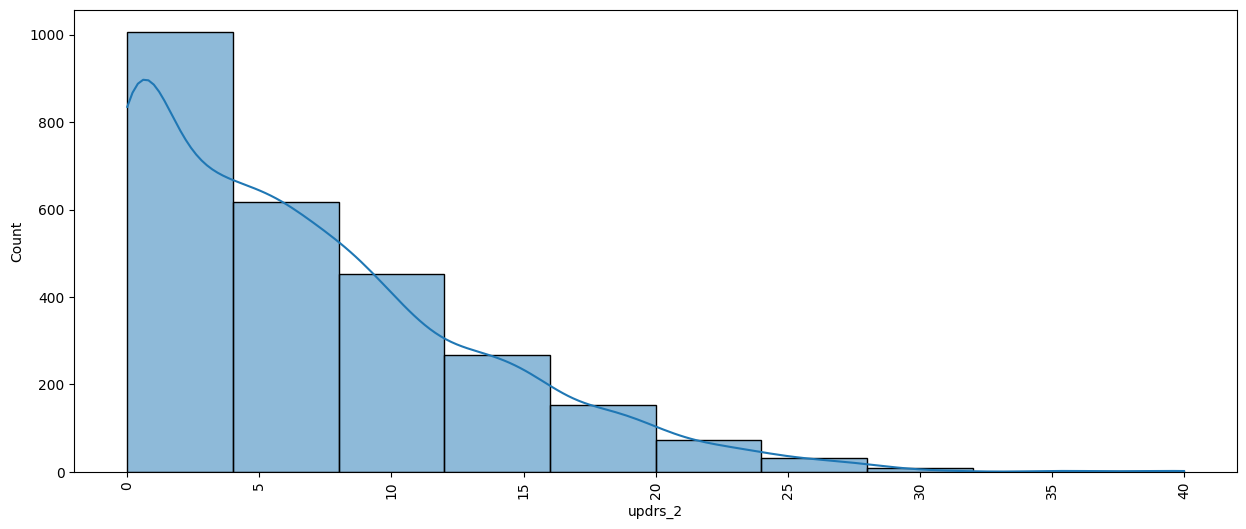

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x = df2['updrs_2'], kde = True, bins = 10, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x = df2['updrs_3'], kde = True, bins = 10, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x = df2['updrs_4'], kde = True, bins = 10, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

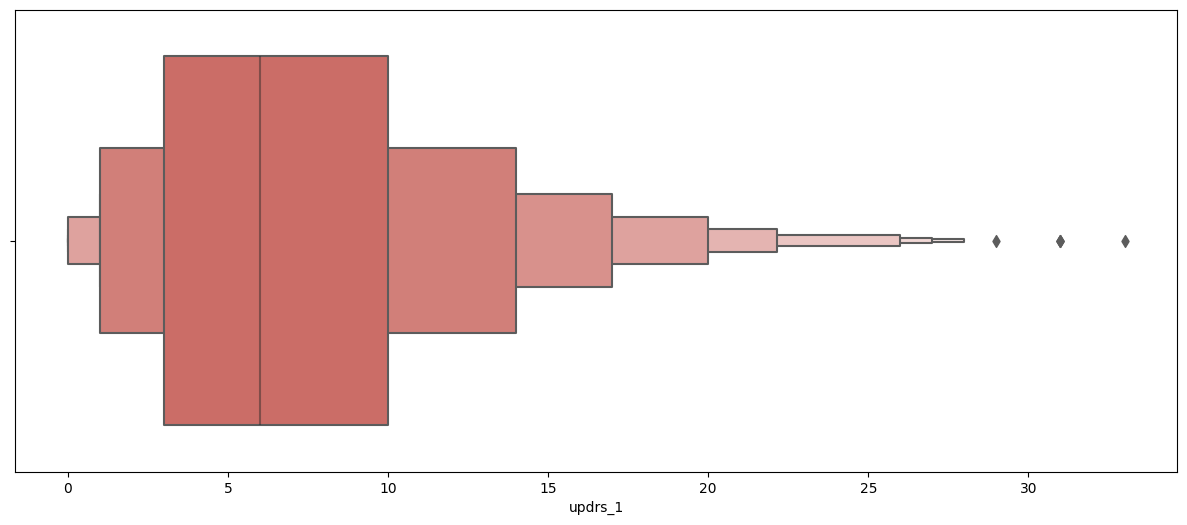

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = df2['updrs_1'], data = df2, palette = 'hls')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = df2['updrs_2'], data = df2, palette = 'hls')
plt.show()

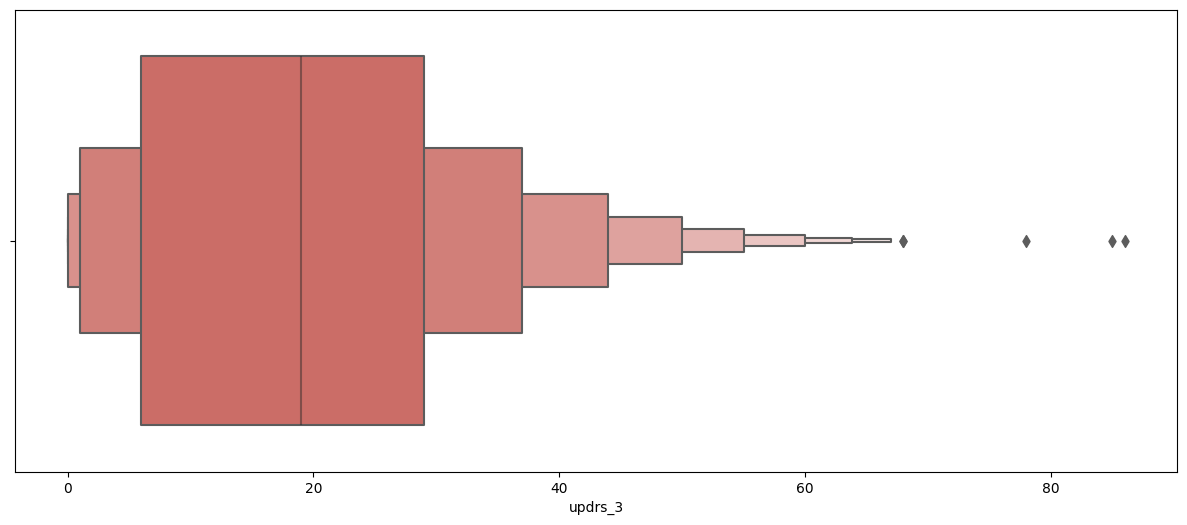

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = df2['updrs_3'], data = df2, palette = 'hls')
plt.show()

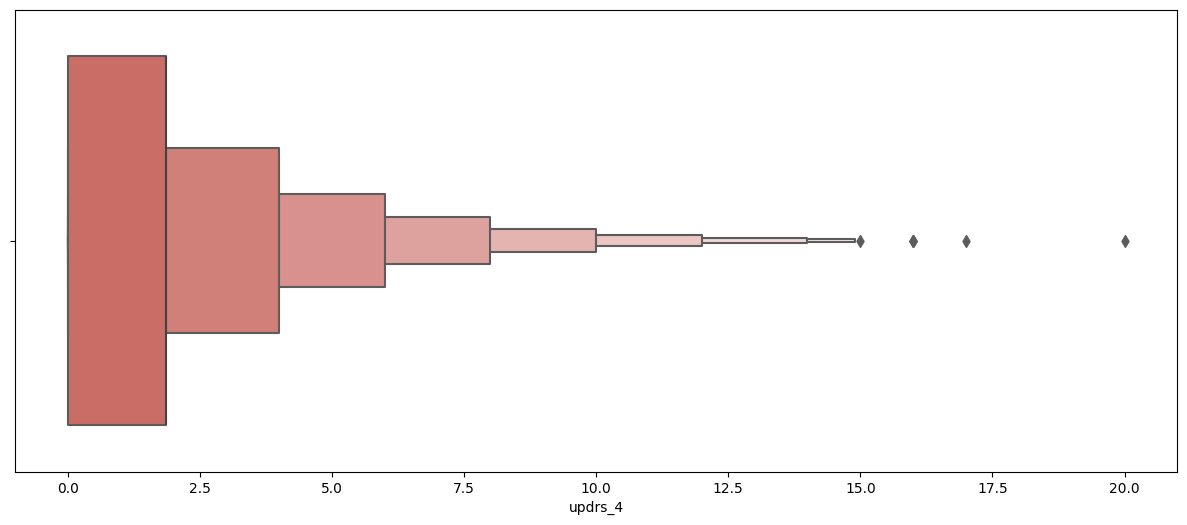

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = df2['updrs_4'], data = df2, palette = 'hls')
plt.show()

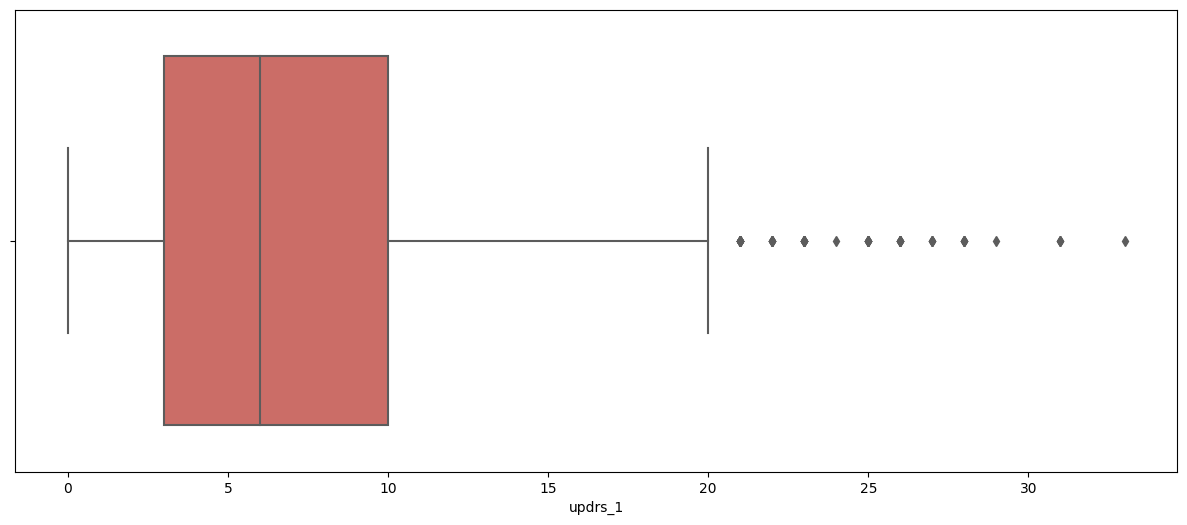

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df2['updrs_1'], data = df2, palette = 'hls')
plt.show()

In [ ]:
df2['upd23b_clinical_state_on_medication'].unique()

array(['Not Avaliable', 'On', 'Off'], dtype=object)

In [ ]:
df2['upd23b_clinical_state_on_medication'].value_counts()

Not Avaliable    1327
On                775
Off               513
Name: upd23b_clinical_state_on_medication, dtype: int64

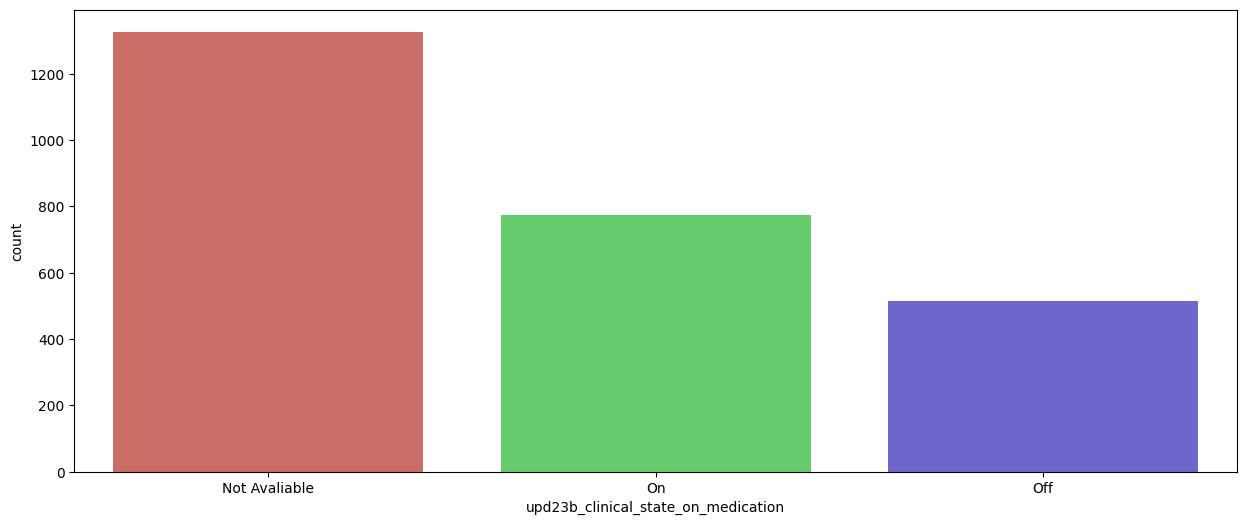

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = df2['upd23b_clinical_state_on_medication'], data = df2, palette = 'hls')
plt.show()

In [ ]:
label_data = df2['upd23b_clinical_state_on_medication'].value_counts()

explode = (0.0, 0.1, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Clinical_State_on_Medication', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df2['visit_month'], y = df2['updrs_1'], hue = df2['upd23b_clinical_state_on_medication'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

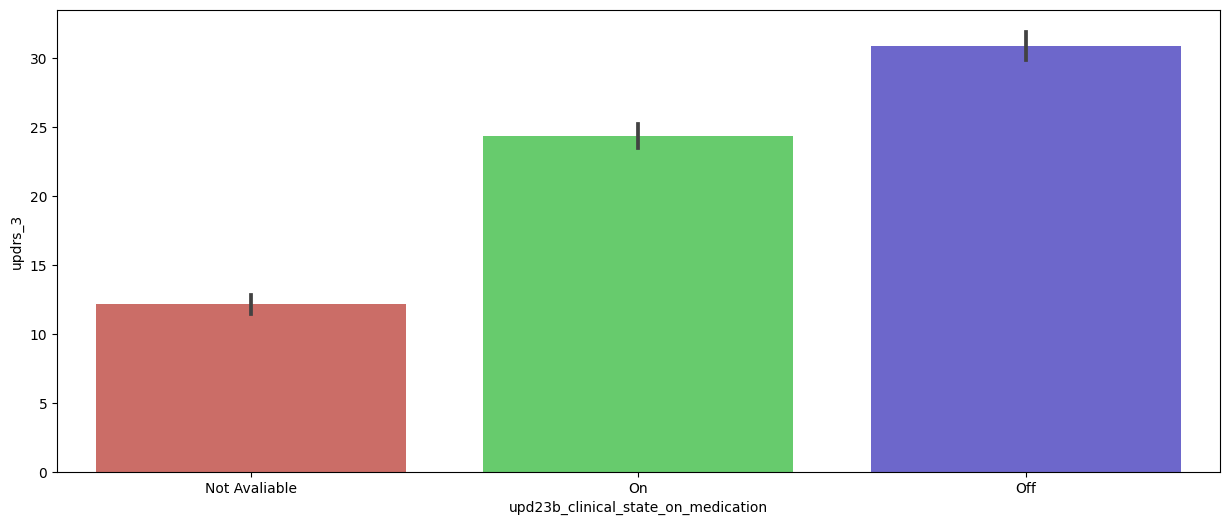

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = df2['updrs_3'], x = df2['upd23b_clinical_state_on_medication'], palette = 'hls')
plt.show()

In [ ]:
df2_corr = df2.corr()

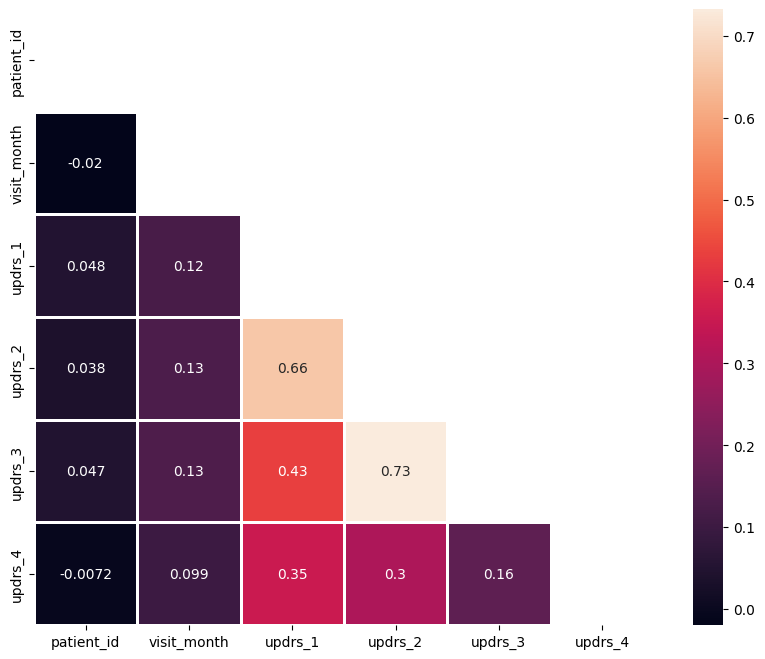

In [ ]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df2_corr)
sns.heatmap(df2_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [ ]:
df.shape

(847363, 6)

In [ ]:
df1.shape

(200981, 5)

In [ ]:
df2.shape

(2615, 8)

In [ ]:
df.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance'],
      dtype='object')

In [ ]:
df1.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX'], dtype='object')

In [ ]:
df2.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [123]:
df_new = df.merge(df1, on=['visit_id', 'visit_month', 'patient_id', 'UniProt'])
df_new = df_new.merge(df2, on=['visit_id', 'visit_month', 'patient_id'])

In [ ]:
df_new.head()

visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance       NPX  \
0                           NEQEQPLGQWHLS           11254.3   11254.3   
1                             GNPEPTFSWTK          102060.0  732430.0   
2                         IEIPSSVQQVPTIIK          174185.0  732430.0   
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  732430.0   
4                            SMEQNGPGLEYR           30838.7  732430.0   

   updrs_1  updrs_2  updrs_3   updrs_4 upd23b_clinical_state_on_medication  
0     10.0      6.0     15.0  1.861763                       Not Avaliable  
1     10.0      6.0     15.0  1.861763                       Not Avaliable  
2     10.0      6.0     15.0  1.861763                       Not Avaliable  
3     10.0      6.0     15.0  1.861763                       Not Avaliable  
4     10.0      6.0     15.0  1.861763                       Not Avaliable

In [ ]:
df_new.tail()

visit_id  visit_month  patient_id UniProt  \
539644  58648_108          108       58648  Q9UHG2   
539645  58648_108          108       58648  Q9UKV8   
539646  58648_108          108       58648  Q9Y646   
539647  58648_108          108       58648  Q9Y6R7   
539648  58648_108          108       58648  Q9Y6R7   

                                 Peptide  PeptideAbundance       NPX  updrs_1  \
539644                   ILAGSADSEGVAAPR         202820.00  369437.0      6.0   
539645                     SGNIPAGTTVDTK         105830.00  105830.0      6.0   
539646                       LALLVDTVGPR          21257.60   21257.6      6.0   
539647  AGC(UniMod_4)VAESTAVC(UniMod_4)R           5127.26   17953.1      6.0   
539648                    GATTSPGVYELSSR          12825.90   17953.1      6.0   

        updrs_2  updrs_3   updrs_4 upd23b_clinical_state_on_medication  
539644      0.0      0.0  1.861763                       Not Avaliable  
539645      0.0      0.0  1.861763                       Not Avaliable  
539646      0.0      0.0  1.861763                       Not Avaliable  
539647      0.0      0.0  1.861763                       Not Avaliable  
539648      0.0      0.0  1.861763                       Not Avaliable

In [ ]:
df_new.shape

(539649, 12)

In [ ]:
df_new.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance', 'NPX', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'upd23b_clinical_state_on_medication'],
      dtype='object')

In [ ]:
df_new.duplicated().sum()

0

In [ ]:
df_new.isnull().sum()

visit_id                               0
visit_month                            0
patient_id                             0
UniProt                                0
Peptide                                0
PeptideAbundance                       0
NPX                                    0
updrs_1                                0
updrs_2                                0
updrs_3                                0
updrs_4                                0
upd23b_clinical_state_on_medication    0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539649 entries, 0 to 539648
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             539649 non-null  object 
 1   visit_month                          539649 non-null  int64  
 2   patient_id                           539649 non-null  int64  
 3   UniProt                              539649 non-null  object 
 4   Peptide                              539649 non-null  object 
 5   PeptideAbundance                     539649 non-null  float64
 6   NPX                                  539649 non-null  float64
 7   updrs_1                              539649 non-null  float64
 8   updrs_2                              539649 non-null  float64
 9   updrs_3                              539649 non-null  float64
 10  updrs_4                              539649 non-null  float64
 11  upd23b_clinic

In [ ]:
df_new.describe()

visit_month     patient_id  PeptideAbundance           NPX  \
count  539649.000000  539649.000000     539649.000000  5.396490e+05   
mean       26.758738   32652.382856      71166.236653  4.322718e+05   
std        22.912143   18626.760180      81205.642003  3.938369e+05   
min         0.000000      55.000000         46.765000  8.460820e+01   
25%         6.000000   16566.000000      19537.900000  8.643140e+04   
50%        24.000000   29417.000000      42528.700000  3.096000e+05   
75%        48.000000   50611.000000      90343.100000  7.138080e+05   
max       108.000000   65043.000000     511044.000000  1.365430e+06   

             updrs_1        updrs_2        updrs_3        updrs_4  
count  539649.000000  539649.000000  539649.000000  539649.000000  
mean        6.538131       5.813343      17.268977       1.884479  
std         5.329968       5.936792      14.959746       2.219452  
min         0.000000       0.000000       0.000000       0.000000  
25%         2.000000       1.000000       2.000000       0.000000  
50%         5.000000       4.000000      16.000000       1.861763  
75%         9.000000       9.000000      28.000000       1.861763  
max        33.000000      29.000000      78.000000      20.000000

In [ ]:
df_new.nunique()

visit_id                                 1068
visit_month                                15
patient_id                                248
UniProt                                   226
Peptide                                   844
PeptideAbundance                       430488
NPX                                    178139
updrs_1                                    30
updrs_2                                    29
updrs_3                                    65
updrs_4                                    18
upd23b_clinical_state_on_medication         3
dtype: int64

In [ ]:
df_new['visit_month'].unique()

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108], dtype=int64)

In [ ]:
df_new['visit_month'].value_counts()

0      98054
12     91046
24     86690
36     73811
48     68616
6      43886
60     42897
84     15400
72     10943
18      3815
108     1516
96      1012
54       969
3        514
30       480
Name: visit_month, dtype: int64

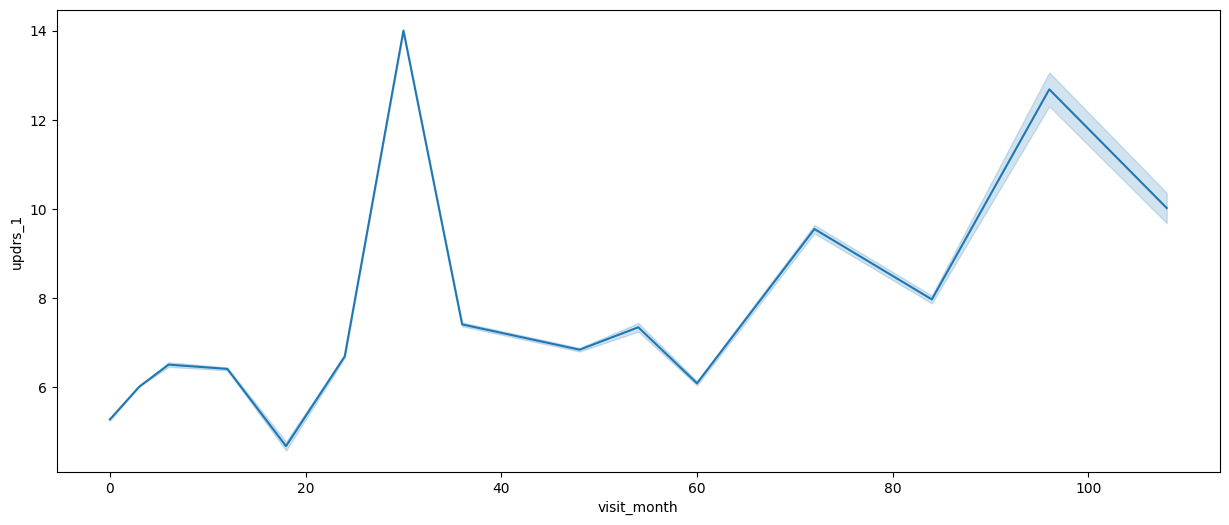

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df_new['visit_month'], y = df_new['updrs_1'], data = df_new, palette = 'hls')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df_new['visit_month'], y = df_new['updrs_2'], data = df_new, palette = 'hls')
plt.show()

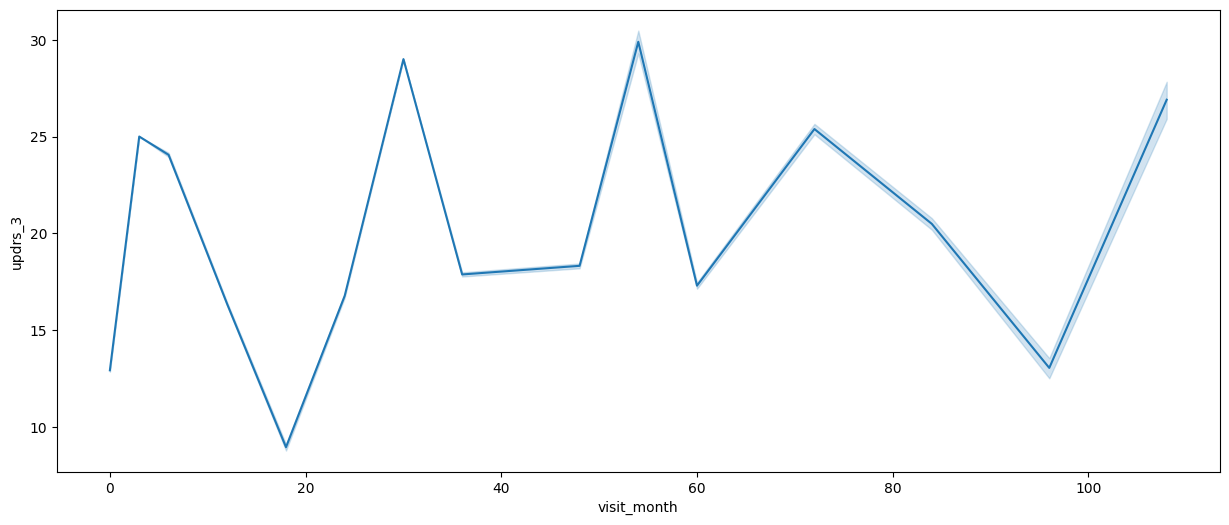

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df_new['visit_month'], y = df_new['updrs_3'], data = df_new, palette = 'hls')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df_new['visit_month'], y = df_new['updrs_4'], data = df_new, palette = 'hls')
plt.show()

In [ ]:
df_new.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance', 'NPX', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'upd23b_clinical_state_on_medication'],
      dtype='object')

In [85]:
df_new_1 = df_new[['PeptideAbundance', 'NPX', 'updrs_1']]

In [ ]:
df_new_1

PeptideAbundance       NPX  updrs_1
0               11254.30   11254.3     10.0
1              102060.00  732430.0     10.0
2              174185.00  732430.0     10.0
3               27278.90  732430.0     10.0
4               30838.70  732430.0     10.0
...                  ...       ...      ...
539644         202820.00  369437.0      6.0
539645         105830.00  105830.0      6.0
539646          21257.60   21257.6      6.0
539647           5127.26   17953.1      6.0
539648          12825.90   17953.1      6.0

[539649 rows x 3 columns]

# On Medication VS Off Medication

In [6]:
train_clincial_data_copy = df2.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

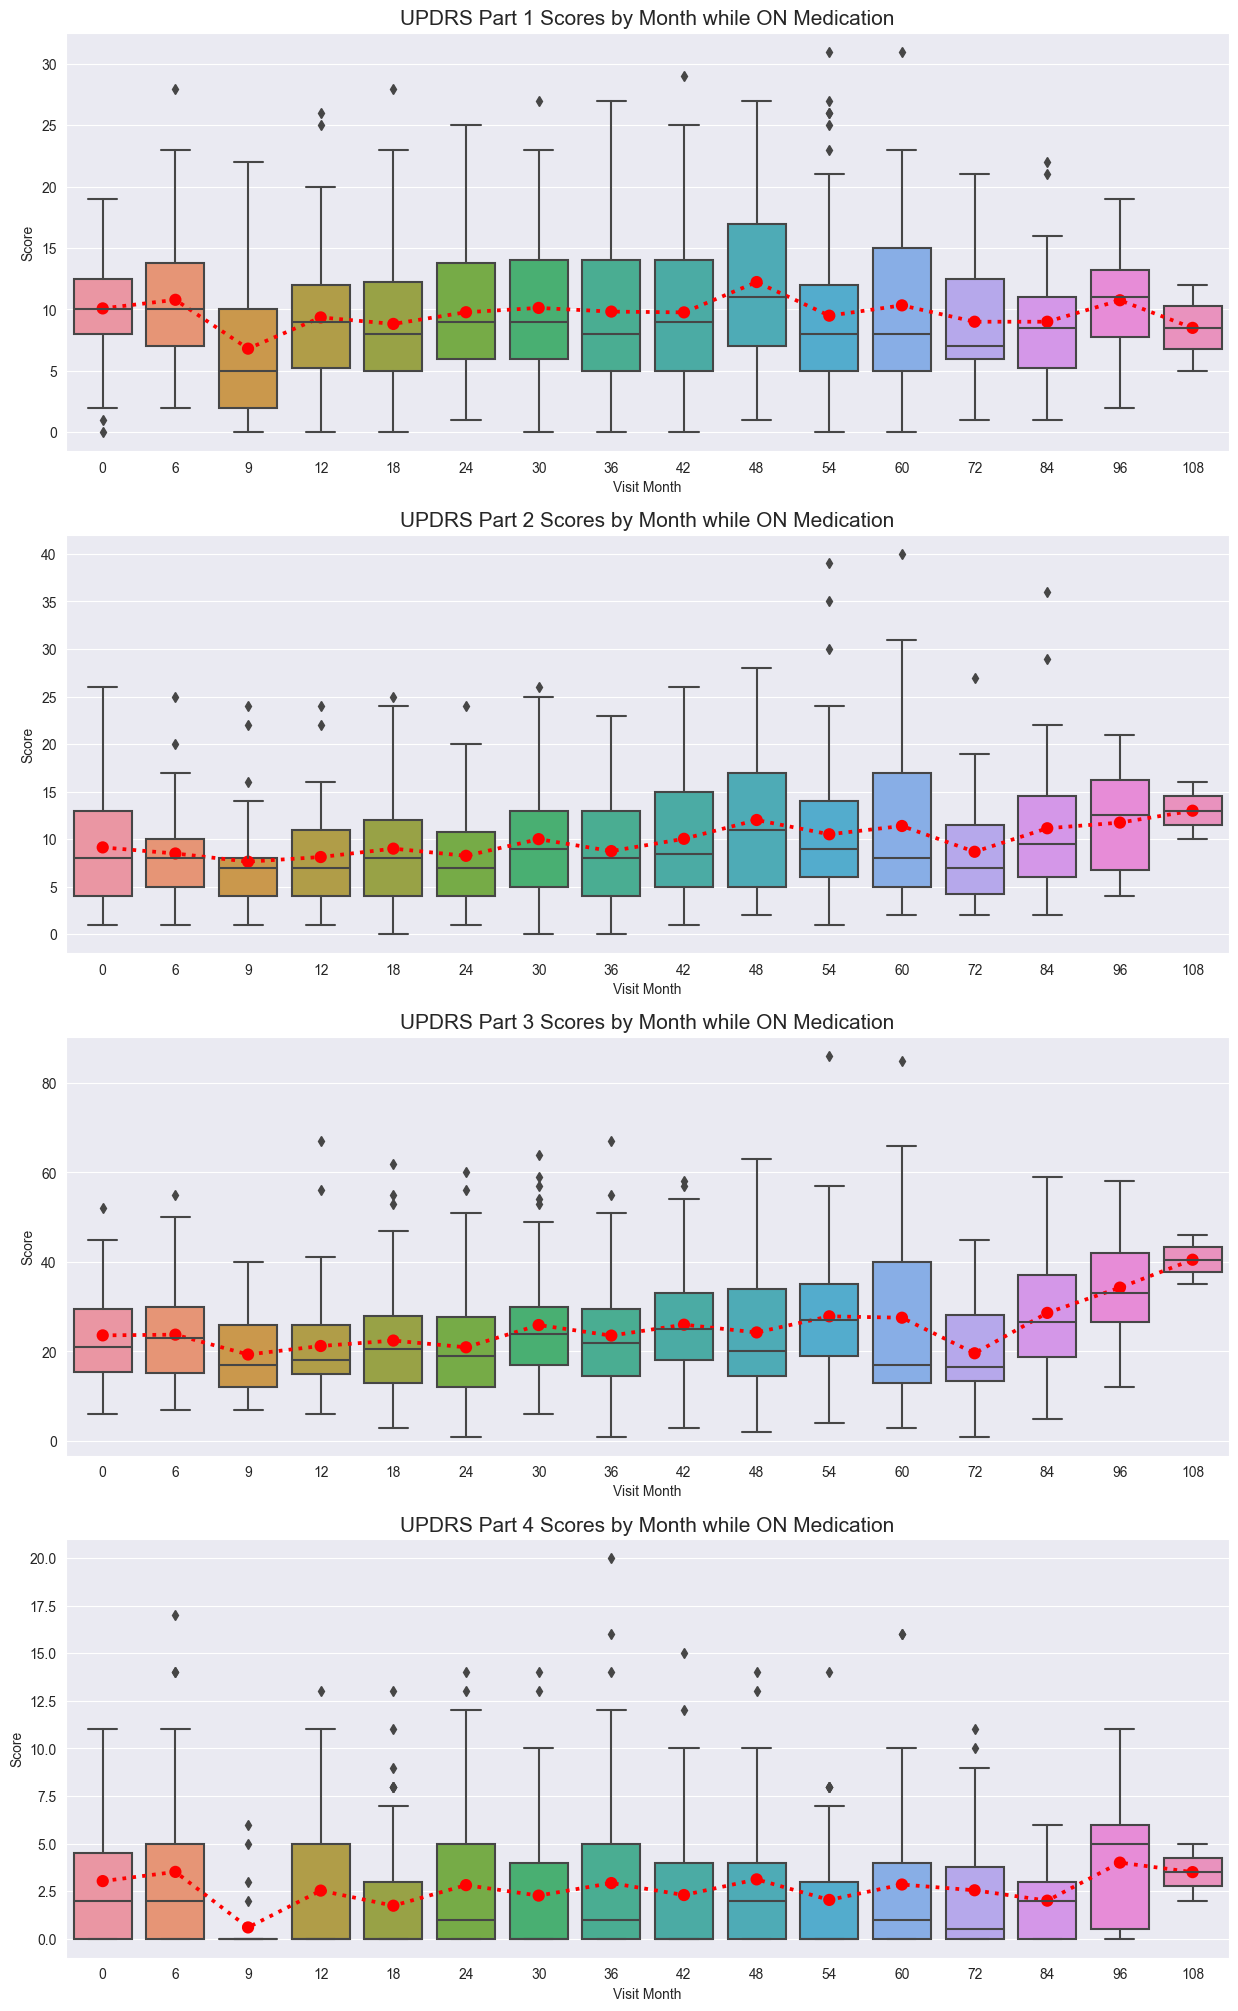

In [7]:
train_clincial_data_copy = df2.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while ON Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

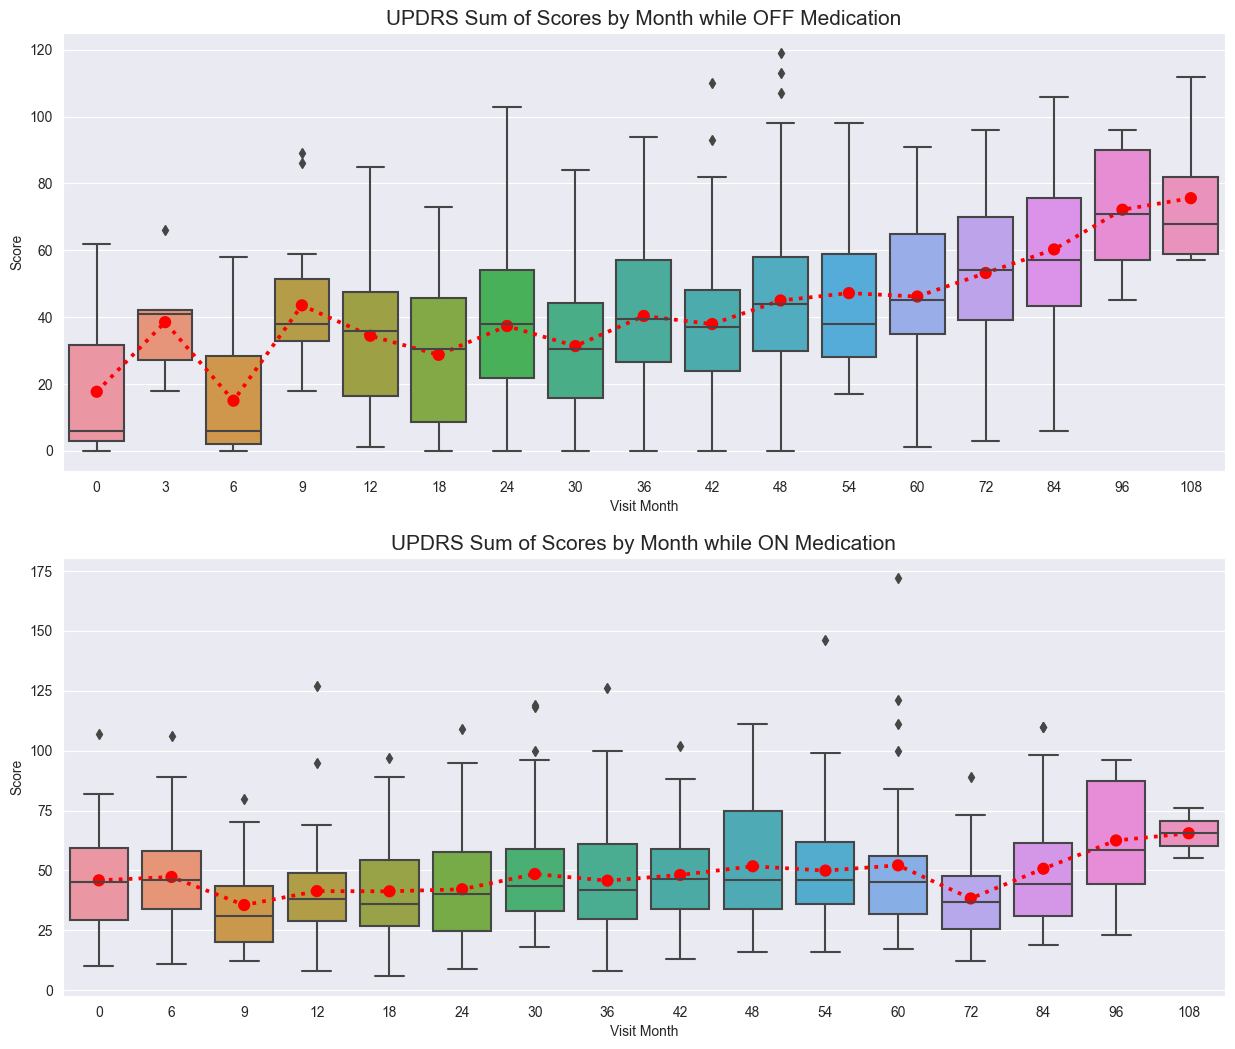

In [10]:

df2["updrs_sum"] = df2["updrs_1"] + df2["updrs_2"] + df2["updrs_3"] + df2["updrs_4"]
train_clincial_data_copy = df2.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12.5))

axs = axs.flatten()

sns.set_style('darkgrid')

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
ax = axs[0]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while OFF Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
ax = axs[1]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while ON Medication", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

In [ ]:
df_new11 = df.merge(df1, on=['visit_id', 'visit_month', 'patient_id', 'UniProt'])
df_new22 = df_new11.merge(df2, on=['visit_id', 'visit_month', 'patient_id'])

In [ ]:
df_newww = df_new22[['PeptideAbundance', 'NPX', 'upd23b_clinical_state_on_medication','updrs_1']]
df_newww["upd23b_clinical_state_on_medication"] = df_new22["upd23b_clinical_state_on_medication"].fillna("Off")
df_newww['upd23b_clinical_state_on_medication'].replace(['Off', 'On'],[0, 1], inplace=True)

In [28]:
X = df_newww.drop('updrs_1', axis =1)
y = df_newww['updrs_1']

In [29]:

scaler = preprocessing.MinMaxScaler()
X[['PeptideAbundance','NPX']]=scaler.fit_transform(X[['PeptideAbundance','NPX']])

In [168]:
X

PeptideAbundance       NPX  upd23b_clinical_state_on_medication
0               0.008215  0.008180                                    0
1               0.074775  0.536354                                    0
2               0.127643  0.536354                                    0
3               0.019961  0.536354                                    0
4               0.022570  0.536354                                    0
...                  ...       ...                                  ...
546072          0.148632  0.270506                                    0
546073          0.077539  0.077446                                    0
546074          0.015547  0.015507                                    0
546075          0.003724  0.013086                                    0
546076          0.009367  0.013086                                    0

[546077 rows x 3 columns]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.30)

In [18]:
lr = LinearRegression()

In [233]:
lr.fit(X_train,y_train)

LinearRegression()

In [234]:
y_pred = lr.predict(X_test)

In [235]:
RMSE_lr = mean_squared_error(y_test, y_pred, squared = False)
RMSE_lr                                                                                                                                                                                                            

1.7703953828855274

In [204]:
r2 = r2_score(y_test, y_pred)
r2                                                                                                                                                                             

0.6566778848183898

In [21]:
dt = DecisionTreeRegressor(max_depth=5)

In [206]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [207]:
y_pred = dt.predict(X_test)

In [213]:
RMSE_dt = mean_squared_error(y_test, y_pred, squared = False)
RMSE_dt                                                                                                                                                                               

1.266637432922594

In [214]:
r2 = r2_score(y_test, y_pred)
r2                                                                                                                                                                                     

0.8088079956043102

In [141]:
# Define the grid of hyperparameters to search
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4]}

# Create a decision tree regression model
dtr = DecisionTreeRegressor()

# Create a grid search object
grid_search = GridSearchCV(dtr, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Train a decision tree regression model with the best hyperparameters
dtr_best = DecisionTreeRegressor(max_depth=best_max_depth,
                                  min_samples_split=best_min_samples_split)
dtr_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [23]:
rf = RandomForestRegressor(max_depth=5, n_estimators=50)

In [215]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50)

In [216]:
y_pred = rf.predict(X_test)

In [221]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared = False)
RMSE_rf                                                                                                                                                                    

1.1660097220358447

In [223]:
r2 = r2_score(y_test, y_pred)
r2                                                                                                                                                                         

0.8584026531025777

In [105]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [1, 2, 3, 4, 5]}

rfr = RandomForestRegressor()

grid_search = GridSearchCV(rfr, param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

rfr_best = RandomForestRegressor(n_estimators=best_n_estimators,
                                  max_depth=best_max_depth)
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50)

In [225]:
model = XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=200)


In [226]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [227]:
y_pred = model.predict(X_test)

In [230]:
RMSE_xg = mean_squared_error(y_test, y_pred, squared = False)
RMSE_xg                                                                                                                                                                                    

1.3653593353769686

In [231]:
r2 = r2_score(y_test, y_pred)                                                                                                                                                                 
r2                                                                                                                                                                                    

0.812687828687378

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Print the best hyperparameters from GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

MSE: 28.275279917063216
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [21]:
#df_newww.to_csv('output.csv', index=False)